<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Supervised Learning Model Comparison

_author The arbitrary and capricious heart of data science_

---

### Let us begin...

Recall the "data science process."
   1. Define the problem.
   2. Gather the data.
   3. Explore the data.
   4. Model the data.
   5. Evaluate the model.
   6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [2]:
df = pd.read_csv("401ksubs.csv")

In [3]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [4]:
df.describe()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
count,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000
mean,0.392129,39.254641,0.628571,0.204420,41.080216,2.885067,19.071675,0.276226,0.254340,2121.192483,1793.652722
std,0.488252,24.090002,0.483213,0.403299,10.299517,1.525835,63.963838,0.447154,0.435513,3001.469424,895.648841
min,0.000000,10.008000,0.000000,0.000000,25.000000,1.000000,-502.302000,0.000000,0.000000,100.160100,625.000000
25%,0.000000,21.660000,0.000000,0.000000,33.000000,2.000000,-0.500000,0.000000,0.000000,469.155600,1089.000000
50%,0.000000,33.288000,1.000000,0.000000,40.000000,3.000000,2.000000,0.000000,0.000000,1108.091000,1600.000000
75%,1.000000,50.160000,1.000000,0.000000,48.000000,4.000000,18.449500,1.000000,1.000000,2516.025500,2304.000000
max,1.000000,199.041000,1.000000,1.000000,64.000000,13.000000,1536.798000,1.000000,1.000000,39617.320000,4096.000000


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

In [5]:
# There are many other variables that could be helpful such as location, 
# ethnicity (races), occupation and industry.
# For location, the assumption is that work in major cities are more likely to
# generate higher income with retirement money match benefits.
# For ethnicity, America is considered a highly unequal country for income.
# Different ethnicity group tends to have significantly different career path.
# For occupation

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

In [6]:
# It would unethical decision as the decision could exclude certain races on bias.
# However, it would be acceptable if the decision to promote income equality to
# minority to reduce the existing systemic bias.

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

In [7]:
# The feature that are reasonably exclude are income and
# income squared as it is target variable or generated by income.

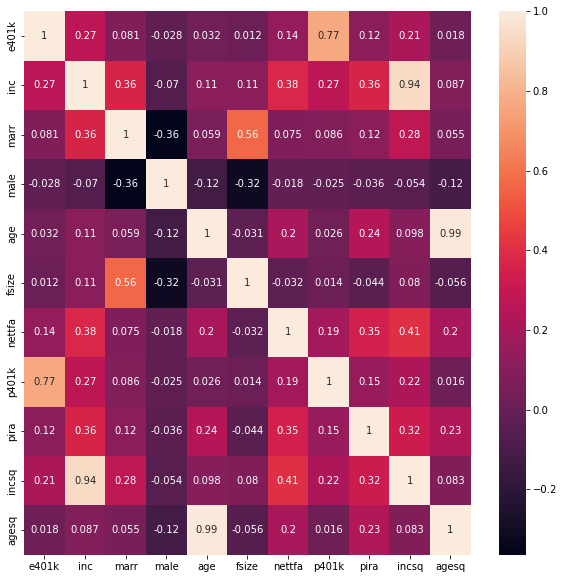

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

In [10]:
# Income squared and Age squared have already been created for us.

In [11]:
# Adding the square of the variable allows you to model more accurately the effect of 
# income & age, which may have a non-linear relationship with the independent variable.

In [12]:
# Moreover, the squared feature engineering might reduce the error cause by the skewed data
# and outliers.

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

In [13]:
df["inc"].median() # Median income are likely to be $33,288 per year.

33.288

In [14]:
# inc variable has variable description as inc^2 which appears to be an error. 
# This is likely to be an human error (mistype) 
# as it should be yearly income in thousands (,000s).

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

In [15]:
# 1. Regularisation and transform variables such as log transformation. 
#    - Cons: This would make it harder to intrepret the coefficient.
# 2. Polynomial and interaction terms to capture non-linear relationship.
#    - Not
# 3. Use Ridge, Lasso, ElasticNet to reduce multicolinearity and simplified
#    the model.
#    - Appropiate for this problem to remove unimportant feature(s).
# 4. Cross-Validation
#    - Appropiate for this problem as it increase validity
# 5. GridSearch to find the best parameter
# 6. Stacking to combine models 
#    

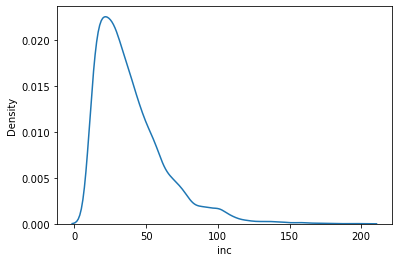

In [16]:
log_inc = np.log(df["inc"])
sns.kdeplot(df["inc"]);

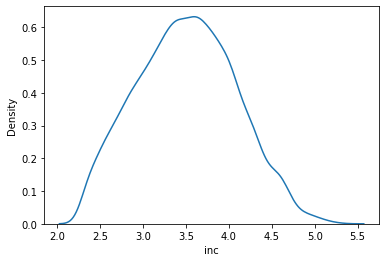

In [17]:
sns.kdeplot(log_inc);

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

When predicting inc, you should pretend as though you do not have access to the e401k, the p401k variable, and the pira variable.

In [111]:
X = df.drop(columns = ["inc","incsq","e401k","p401k","pira"])
y = df["inc"] # target variable , Consider log(inc), log_inc
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=42)

In [112]:
X.head()

,marr,male,age,fsize,nettfa,agesq
0,0,0,40,1,4.575,1600
1,0,1,35,1,154.000,1225
2,1,0,44,2,0.000,1936
3,1,1,44,2,21.800,1936
4,0,0,53,1,18.450,2809


In [113]:
# Instatiate linear model
lr = LinearRegression()

# Fit model
lr.fit(X_train,y_train)

# Predict
lr_train_preds = lr.predict(X_train)
lr_test_preds = lr.predict(X_test)

In [114]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.29825465142628516
0.2616669416042767


In [115]:
y_train.mean()

39.268449396204744

In [116]:
y_test.mean()

39.21322164726173

#### kNN (k-nearest neighbors model)

In [117]:
# Instatiate linear model
knn = KNeighborsRegressor()
# Scale the
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Fit model
knn.fit(X_train_sc,y_train)

# Predict
knn_train_preds = knn.predict(X_train_sc)
knn_test_preds = knn.predict(X_test_sc)

In [118]:
print(knn.score(X_train_sc,y_train))
print(knn.score(X_test_sc,y_test))

0.5284956467019807
0.3098233766707408


#### Decision Tree

In [131]:
# Instatiate Decision tree model
dtree = DecisionTreeRegressor()

# Fit model
dtree.fit(X_train,y_train)

# Predict
dtree_train_preds = dtree.predict(X_train)
dtree_test_preds = dtree.predict(X_test)

In [132]:
print(dtree.score(X_train,y_train))
print(dtree.score(X_test,y_test))

0.9908140061424364
-0.2170107927774374


Decision Tree is very overfit. The score is R-squared. The negative R show that this model is worse than using average income.

#### Bagged Decision Trees

In [133]:
# Instatiate Bagged Decision tree model
bagr = BaggingRegressor()

# Fit model
bagr.fit(X_train,y_train)

# Predict
bagr_train_preds = bagr.predict(X_train)
bagr_test_preds = bagr.predict(X_test)

In [134]:
print(bagr.score(X_train,y_train))
print(bagr.score(X_test,y_test))

0.8618797220029044
0.2546523444721982


#### Random Forest Regressor Model

In [204]:
# Instatiate Random Forest model
rfr = RandomForestRegressor(random_state=42)

# Fit model
rfr.fit(X_train,y_train)

# Predict
rfr_train_preds = rfr.predict(X_train)
rfr_test_preds = rfr.predict(X_test)

In [205]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.93924841660956
0.5614669297568055


In [206]:
rfr.feature_names_in_

array(['inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k', 'pira',
       'incsq', 'agesq'], dtype=object)

In [207]:
rfr.feature_importances_

array([0.07805246, 0.0071765 , 0.00867785, 0.03826064, 0.03000568,
       0.12417222, 0.59018074, 0.00685785, 0.07785996, 0.0387561 ])

The most important feature is nettfa (net total assets) followed by marriage status and age (age squared).

In [134]:
print(bagr.score(X_train,y_train))
print(bagr.score(X_test,y_test))

0.8618797220029044
0.2546523444721982


In [34]:
# RandomForest Parameteer
rfr_params = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8]
}

In [35]:
# Instatiate Random Forest model 
start_time = time.time()

# Instantiate our GridSearchCV object.
CV_rfr = GridSearchCV(estimator=rfr, param_grid=rfr_params, cv= 5)

# Fit model
CV_rfr.fit(X_train,y_train)

# Predict
CV_rfr_train_preds = CV_rfr.predict(X_train)
CV_rfr_test_preds = CV_rfr.predict(X_test)

# Runtime
print(time.time()-start_time)

97.65761542320251


In [36]:
print(CV_rfr.score(X_train,y_train))
print(CV_rfr.score(X_test,y_test))

0.4613447411119862
0.3940898190228731


In [37]:
CV_rfr.best_params_

{'max_depth': 6, 'n_estimators': 200}

In [145]:
# Instatiate ada model
ada = AdaBoostRegressor(rfr,random_state=42)

# Fit model
ada.fit(X_train,y_train)

# Predict
ada_train_preds = ada.predict(X_train)
ada_test_preds = ada.predict(X_test)

In [146]:
print(ada.score(X_train,y_train))
print(ada.score(X_test,y_test))

0.7905295141703853
0.27544254007217095


##### 9. What is bootstrapping?

In [40]:
# Bootstrapping is a resample method where random sampling with replacement
# to approximate the distribution of population.

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

In [41]:
# A decision tree is a greedy model that optimise error at each node. So,
# decision tree tends to overfit to the sample.
# A set of bagged decision trees is set of tree construct by randomised row of
# data. Bagged model tends to reduce overfitting and perform better than a tree.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

In [42]:
# Bagged decision trees only resampling rows of data and use all available columns.
# A random forest is multipled randomised tree with resample rows and columns.
# A random forest model tends to reduce overfitting and perform better than bagged trees.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

In [43]:
# Random forest tends to be superior to bagged decision trees because
# Decision tree models are likely to be high variance (overfitting).
# Random forest tend to reduce variance but increase bias.
# The optimal model usually have moderate bias and variance.
# Random forest using random features make the model more independents
# and it could be much faster as the tree only use subset of the features.

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [125]:
df["inc"].describe()

count    9275.000000
mean       39.254641
std        24.090002
min        10.008000
25%        21.660000
50%        33.288000
75%        50.160000
max       199.041000
Name: inc, dtype: float64

Linear Regression Model

In [126]:
# Training RMSE
metrics.mean_squared_error(y_train, lr_train_preds, squared=False)

20.08643299127149

In [127]:
metrics.mean_squared_error(y_test, lr_test_preds, squared=False)

20.981222872070013

kNN Regression Model

In [128]:
# Training RMSE
metrics.mean_squared_error(y_train, knn_train_preds, squared=False)

16.4647788729404

In [129]:
metrics.mean_squared_error(y_test, knn_test_preds, squared=False)

20.285455438782417

Decision Tree Regression Model

In [135]:
# Training RMSE
metrics.mean_squared_error(y_train, dtree_train_preds, squared=False)

2.298138107855747

In [136]:
metrics.mean_squared_error(y_test, dtree_test_preds, squared=False)

26.93716303689301

Bagged Decision Tree Regression Model

In [137]:
# Training RMSE
metrics.mean_squared_error(y_train, bagr_train_preds, squared=False)

8.91131449389665

In [138]:
metrics.mean_squared_error(y_test, bagr_test_preds, squared=False)

21.08065422831875

Random Forest Regressor Model

In [139]:
metrics.mean_squared_error(y_train, rfr_train_preds, squared=False)

7.673716049482921

In [140]:
metrics.mean_squared_error(y_test, rfr_test_preds, squared=False)

20.498694456961577

Grid Search Random Forest Regressor Model

In [51]:
metrics.mean_squared_error(y_train, CV_rfr_train_preds, squared=False)

17.59821021160548

In [52]:
metrics.mean_squared_error(y_test, CV_rfr_test_preds, squared=False)

19.006789501224524

Ada Regressor Model

In [147]:
metrics.mean_squared_error(y_train, ada_train_preds, squared=False)

10.9742403847494

In [148]:
metrics.mean_squared_error(y_test, ada_test_preds, squared=False)

20.78457057709075

##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

In [53]:
# Yes, Random Forest Regressor is overfitting as the test RMSE is significantly lower
# than the training RMSE.

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [54]:
# My final model would be GridSearch Random Forest Model.

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [55]:
# 1. I would stack multiple models in order to find the best combination of models.
# 2. I would clean and remove outliers to improve the intregrity of the data source.
# 3. I would tune the hyperparameters to find the optimal model.

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

In [202]:
df.groupby(["e401k","p401k"])["e401k"].count()

e401k  p401k
0      0        5638
1      0        1075
       1        2562
Name: e401k, dtype: int64

In [56]:
# 1. p401k is highly correlated with and conditional on e401k. 
# You have to be eligible to partcipate. So if you e401k is a requirement for p401k.

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

In [57]:
# 1. Data Cleaning: (Not applicable as the data is already cleaned)
#   a. Remove outliers
#   b. Imputation
# 2. Feature Engineering: (Not appropritate as data already have income squared.)
# 3. Scale data (Appropiate) as the scaled data would have better predictive power but
#    the model would be harder to interpreted.
# 4. Train weak learner (XGboost) is appropiater
# 5. Stacking model

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [167]:
df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

In [168]:
X = df.drop(columns = ["e401k"])
y = df["e401k"] # target variable 
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=42,
                                                    stratify=y)

In [169]:
y_train.mean()

0.3921794134560092

In [170]:
y_test.mean()

0.39197930142302717

In [171]:
X2 = df.drop(columns = ["e401k","p401k"]) # Also drop p401k
y2 = df["e401k"] # target variable
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,
                                                    random_state=42,
                                                    stratify=y2)

In [172]:
# Instatiate logistic model
logreg = LogisticRegression(max_iter=500)

# Fit model
logreg.fit(X_train,y_train)

# Predict
logreg_train_preds = logreg.predict(X_train)
logreg_test_preds = logreg.predict(X_test)

In [173]:
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.8834100057504313
0.8861578266494179


In [174]:
logreg.feature_names_in_

array(['inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k', 'pira',
       'incsq', 'agesq'], dtype=object)

In [175]:
logreg.coef_

array([[ 5.69935908e-02, -3.36522620e-01, -2.74883742e-01,
        -1.08151252e-01, -2.54961690e-02, -1.27155254e-03,
         7.28503237e+00, -3.89593629e-01, -3.33752367e-04,
         1.21567946e-03]])

The most important feature is p401k (participate in 401k) followed by nettfa (net total assets) and income.

#### Check Logreg2 (without p401k)

In [176]:
# Instatiate logistic model
logreg2 = LogisticRegression(max_iter=500)

# Fit model
logreg2.fit(X2_train,y2_train)

# Predict
logreg2_train_preds = logreg2.predict(X2_train)
logreg2_test_preds = logreg2.predict(X2_test)

In [177]:
print(logreg2.score(X2_train,y2_train))
print(logreg2.score(X2_test,y2_test))

0.6474985623921794
0.6584734799482536


In [178]:
logreg2.feature_names_in_

array(['inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'pira', 'incsq',
       'agesq'], dtype=object)

In [179]:
logreg2.coef_

array([[ 0.05262399, -0.00163838, -0.00210172, -0.08623878, -0.01489587,
         0.00328184,  0.00108838, -0.000276  ,  0.00089053]])

The model reduce accuracy score significantly after removing p401k. 
Age and income variables are significant predictors.

#### kNN

In [180]:
# Instatiate kNN model
knn = KNeighborsClassifier()
# Scale the
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Fit model
knn.fit(X_train_sc,y_train)

# Predict
knn_train_preds = knn.predict(X_train_sc)
knn_test_preds = knn.predict(X_test_sc)

In [181]:
print(knn.score(X_train_sc,y_train))
print(knn.score(X_test_sc,y_test))

0.894335825186889
0.8633031479085813


#### DecisionTree

In [182]:
# Instatiate Decision tree model
ctree = DecisionTreeClassifier()

# Fit model
ctree.fit(X_train,y_train)

# Predict
tree_train_preds = ctree.predict(X_train)
tree_test_preds = ctree.predict(X_test)

In [183]:
print(ctree.score(X_train,y_train))
print(ctree.score(X_test,y_test))

1.0
0.802501078050884


Decision Tree have a significantly higher score than decision tree. Yet, similar score to logistic regression.

#### Bagged Decision Trees

In [184]:
# Instatiate Bagged Decision tree model
bagc = BaggingClassifier()

# Fit model
bagc.fit(X_train,y_train)

# Predict
bagc_train_preds = bagc.predict(X_train)
bagc_test_preds = bagc.predict(X_test)

In [185]:
print(bagc.score(X_train,y_train))
print(bagc.score(X_test,y_test))

0.9810235767682576
0.871927554980595


#### Random Forest Classfier Model

In [187]:
# Instatiate Random Forest model
rfc = RandomForestClassifier(random_state=42)

# Fit model
rfc.fit(X_train,y_train)

# Predict
rfc_train_preds = rfc.predict(X_train)
rfc_test_preds = rfc.predict(X_test)

In [188]:
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

1.0
0.881845623113411


In [189]:
rfr.feature_names_in_

array(['marr', 'male', 'age', 'fsize', 'nettfa', 'agesq'], dtype=object)

In [190]:
rfr.feature_importances_

array([0.09943959, 0.0216213 , 0.09893277, 0.06887751, 0.60925184,
       0.10187698])

#### GridSearch Random Forest

In [77]:
# RandomForest Parameteer
rfc_params = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8]
}

In [78]:
# Instatiate Random Forest model 
start_time = time.time()
rfc=RandomForestClassifier(random_state=42)

# Instantiate our GridSearchCV object.
CV_rfc = GridSearchCV(estimator=rfc, param_grid=rfr_params, cv= 5)

# Fit model
CV_rfc.fit(X_train,y_train)

# Predict
CV_rfc_train_preds = CV_rfc.predict(X_train)
CV_rfc_test_preds = CV_rfc.predict(X_test)

# Runtime
print(time.time()-start_time)

76.19823908805847


In [79]:
print(CV_rfc.score(X_train,y_train))
print(CV_rfc.score(X_test,y_test))

0.8834100057504313
0.8861578266494179


In [80]:
CV_rfc.best_params_

{'max_depth': 4, 'n_estimators': 200}

In [81]:
# Instatiate ada model
ada = AdaBoostClassifier(rfc,random_state=42)

# Fit model
ada.fit(X_train,y_train)

# Predict
ada_train_preds = ada.predict(X_train)
ada_test_preds = ada.predict(X_test)

In [82]:
print(ada.score(X_train,y_train))
print(ada.score(X_test,y_test))

1.0
0.8796895213454075


Ada Model has lower score than random forest classifier. So, the best model is GridSearch Random Forest Classifier model.

In [83]:
ada.feature_names_in_

array(['inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k', 'pira',
       'incsq', 'agesq'], dtype=object)

In [84]:
ada.feature_importances_

array([0.10630414, 0.00807052, 0.0084297 , 0.04723861, 0.03005779,
       0.1241804 , 0.51323968, 0.00884442, 0.10548627, 0.04814847])

## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

In [85]:
# False positives are people whom the model predicts incorrectly that 
# they are eligible for 401(k).

# False negatives are people whom the model predicts incorrectly that 
# they are not eligible for 401(k).

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

In [86]:
# We rather minimize false negatives as the group who could benefit from employer-sponsor funded,
# would be missed on the essential benefits with the long-term financial impact on retirement.

# False positive is only a short-term nuisance.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

In [87]:
# Recall, True Positive Rate, Sensitive rate is the metric we would optimise for.

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

In [88]:
# F1-Score is the average of precision and recall. 
# If the cost of false positive and negatives is equal, then
# F1-Score could be a good indicator.

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

###### Best Model: GridSearch Random Forest Regressor

In [89]:
f1_score(y_train,CV_rfc_train_preds)

0.8254036598493004

In [90]:
confusion_matrix(y_train,CV_rfc_train_preds)

array([[4228,    0],
       [ 811, 1917]], dtype=int64)

In [91]:
print(classification_report(y_train,CV_rfc_train_preds))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4228
           1       1.00      0.70      0.83      2728

    accuracy                           0.88      6956
   macro avg       0.92      0.85      0.87      6956
weighted avg       0.90      0.88      0.88      6956



Training data have F1 Score of 0.83 which can be also be see in classification report.
The maximum value is 1. So, the model is very accurate with classification.

In [92]:
f1_score(y_test,CV_rfc_test_preds)

0.8301158301158301

In [93]:
confusion_matrix(y_test,CV_rfc_test_preds)

array([[1410,    0],
       [ 264,  645]], dtype=int64)

In [94]:
print(classification_report(y_test,CV_rfc_test_preds))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1410
           1       1.00      0.71      0.83       909

    accuracy                           0.89      2319
   macro avg       0.92      0.85      0.87      2319
weighted avg       0.90      0.89      0.88      2319



Testing data have F1 Score of 0.83 which is similar to the training value.
It could be intrepreted as the model is not overfit with high accuracy.

##### Logistic Regression Model

In [95]:
f1_score(y_train,logreg_train_preds)

0.8254036598493004

In [96]:
f1_score(y_test,logreg_test_preds)

0.8301158301158301

##### Ada Model

In [97]:
f1_score(y_train,ada_train_preds)

1.0

In [98]:
f1_score(y_test,ada_test_preds)

0.8230818008877616

##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

In [99]:
# Yes, Ada model is overfitting as the test score is significantly lower than train score.

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [100]:
print(logreg.score(X_test,y_test) - CV_rfc.score(X_test,y_test))

0.0


In [101]:
# My final model would be logistic regression model as it have highest score and
# it is the easiest to interpret and explain to non-technical audiences.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [102]:
# 1. I would stack multiple models in order to find the best combination of models.
# 2. I would clean and remove outliers to improve the intregrity of the data source.
# 3. I would tune the hyperparameters to find the optimal model.

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

### Regression: 
GridSearch Decision Tree Regressor is the best model.

In [103]:
CV_rfr.best_estimator_

RandomForestRegressor(max_depth=6, n_estimators=200, random_state=42)

In [208]:
CV_rfr.feature_names_in_

array(['marr', 'male', 'age', 'fsize', 'nettfa', 'agesq'], dtype=object)

In [209]:
rfr.feature_importances_

array([0.07805246, 0.0071765 , 0.00867785, 0.03826064, 0.03000568,
       0.12417222, 0.59018074, 0.00685785, 0.07785996, 0.0387561 ])

The important feature to predict income is nettfa (net total assets) followed by age (age squared) and marital status.

The models need more features to more accurately predict income as assets, gender, age and marital status are weak predictors of income.

### Classification

In [210]:
logreg.feature_names_in_

array(['inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k', 'pira',
       'incsq', 'agesq'], dtype=object)

In [211]:
logreg.coef_

array([[ 5.69935908e-02, -3.36522620e-01, -2.74883742e-01,
        -1.08151252e-01, -2.54961690e-02, -1.27155254e-03,
         7.28503237e+00, -3.89593629e-01, -3.33752367e-04,
         1.21567946e-03]])

The most important feature to predict e401k (eligibility to 401k) is p401k (participate in 401k) followed by nettfa (net total assets) and income.

The model perform well due to the highly correlated variable of p401k. This could be an issue if new data do not contain p401k.